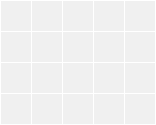

In [12]:
def count_neighbor(cell,i,j):
    p=0
    for n in range(3):
        for m in range(3):
            x = j-1+n
            y=i-1+m
            if n==1 and m==1:
                pass 
            elif 0<= x <=2 and 0<=y<=2:
                p+=cell[y][x]
    return p

def lifegame_rule(cur,neighbor):
    if cur==1:
        if neighbor <=1:
            cur=0
        elif neighbor ==2 or neighbor ==3:
            cur=1
        elif neighbor >=4:
            cur=0
    else:
        if neighbor ==3:
            cur=1
        else:
            cur=0
    return cur    

def make_array(nlines,nrows):
    array = []
    for i in range(nlines):
        row = []
        for j in range(nrows):
            row.append(0)
        array.append(row)
    return( array )
def lifegame_step(cell):
    next_list=make_array(len(cell),len(cell[0]))
    print(next_list)
    for x in range(len(cell)):
        for y in range(len(cell[0])):
            next_list[x][y] = lifegame_rule(cell[x][y],count_neighbor(cell,x,y))
    return next_list

def lifegame_print(cell,steps):
    i=0
    print('{} {}'.format(i,cell))
    step=cell
    for n in range(steps):
        i=i+1
        step = lifegame_step(step)
        print('{} {}'.format(i,step))
        
import time
from IPython.display import clear_output
from ipythonblocks import BlockGrid, ImageGrid, Color, colors

def cell_show(cell, bsize):
    alive = Color(0, 0, 0)
    dead = Color(240, 240, 240)
    height = len(cell)
    width = len(cell[0])
    grid = BlockGrid(width, height, block_size=bsize)
    for i in range(height):
        for j in range(width):
            if(cell[i][j] == 1):
                grid[i, j] = alive
            else:
                grid[i, j] = dead
    grid.show_image()
    
import time
from IPython.display import clear_output

def lifegame_animation(cell,steps,bsize,t):
    cell_show(cell,bsize)
    future = cell 
    for i in range(steps):
        time.sleep(t)
        future = lifegame_step(future)
        clear_output()
        cell_show(future,bsize)

# 実行例

cell54=[[0,0,1,0,1]
       ,[1,1,1,0,0]
       ,[1,0,1,1,0]
       ,[1,1,0,0,1]]
lifegame_animation(cell54, 5, 30, 1)

In [ ]:
# 3. 保存する関数
def cell_s(cell, bsize,n):
    alive = Color(0, 0, 0)
    dead = Color(240, 240, 240)
    height = len(cell)
    width = len(cell[0])
    grid = BlockGrid(width, height, block_size=bsize)
    for i in range(height):
        for j in range(width):
            if(cell[i][j] == 1):
                grid[i, j] = alive
            else:
                grid[i, j] = dead
    grid.save_image(filename='life{}.png'.format(n))

def cell_g(c,steps,bsize,t):
    for i in range(steps):
        cell_s(c,bsize,i)
        time.sleep(t)
        clear_output()
        c=lifegame_step(c)

def lifegame_print_autostop(cell, steps):
    print(0,cell)
    for i in range(steps):
        if (cell==lifegame_step(cell)):
            break;
        cell=lifegame_step(cell)
        print(i+1,cell)
        
# 実行例

c1 =  [[0, 1, 1], [0, 0, 0], [1, 0, 0]]
lifegame_print_autostop(c1,10)